<a href="https://colab.research.google.com/github/vidyasagarverma/Image-Classification/blob/master/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:

import tensorflow as tf
mnist = tf.keras.datasets.mnist



In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

Instructions for updating:
Use tf.cast instead.


In [ ]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [ ]:
model.fit(xs, ys, epochs=500)

Instructions for updating:
Use tf.cast instead.
Epoch 1/500
6/6 [==============================] - 0s 15ms/sample - loss: 1.9369
Epoch 2/500
6/6 [==============================] - 0s 727us/sample - loss: 1.6669
Epoch 3/500
6/6 [==============================] - 0s 261us/sample - loss: 1.4515
Epoch 4/500
6/6 [==============================] - 0s 200us/sample - loss: 1.2792
Epoch 5/500
6/6 [==============================] - 0s 196us/sample - loss: 1.1408
Epoch 6/500
6/6 [==============================] - 0s 247us/sample - loss: 1.0291
Epoch 7/500
6/6 [==============================] - 0s 356us/sample - loss: 0.9386
Epoch 8/500
6/6 [==============================] - 0s 249us/sample - loss: 0.8647
Epoch 9/500
6/6 [==============================] - 0s 246us/sample - loss: 0.8040
Epoch 10/500
6/6 [==============================] - 0s 287us/sample - loss: 0.7537
Epoch 11/500
6/6 [==============================] - 0s 226us/sample - loss: 0.7116
Epoch 12/500
6/6 [==============================]

In [ ]:
print(model.predict([10.0]))

[[18.985828]]


In [ ]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

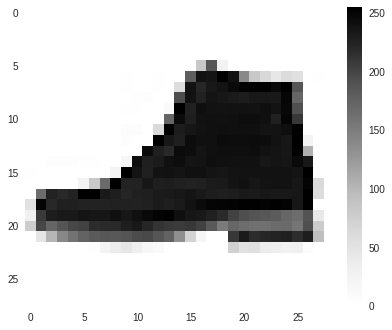

In [ ]:
plt.figure()
plt.imshow(train_images[42])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

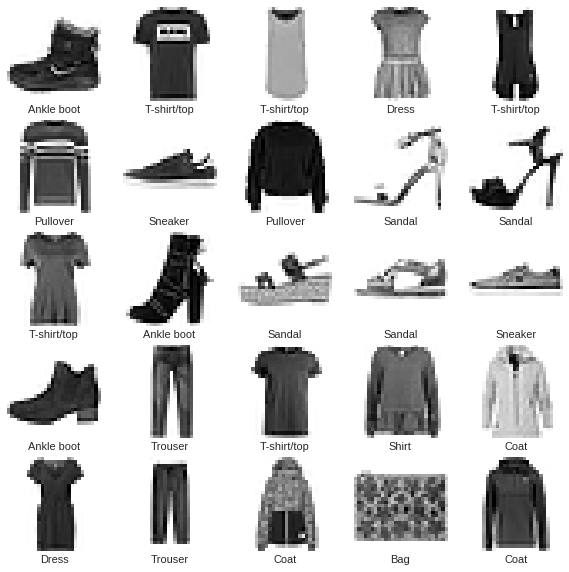

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.5018 - acc: 0.8226
Epoch 2/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3739 - acc: 0.8644
Epoch 3/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3345 - acc: 0.8777
Epoch 4/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3130 - acc: 0.8850
Epoch 5/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2962 - acc: 0.8905


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3440 - acc: 0.8771
Test accuracy: 0.8771


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([5.77429205e-07, 3.19540590e-07, 8.10186236e-07, 1.76772019e-08,
       4.27055824e-07, 2.94430484e-03, 5.62770992e-07, 1.22064175e-02,
       6.16772058e-06, 9.84840333e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

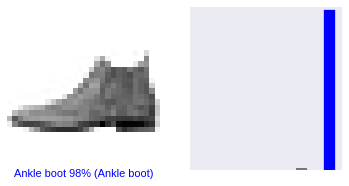

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

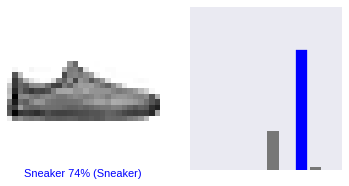

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

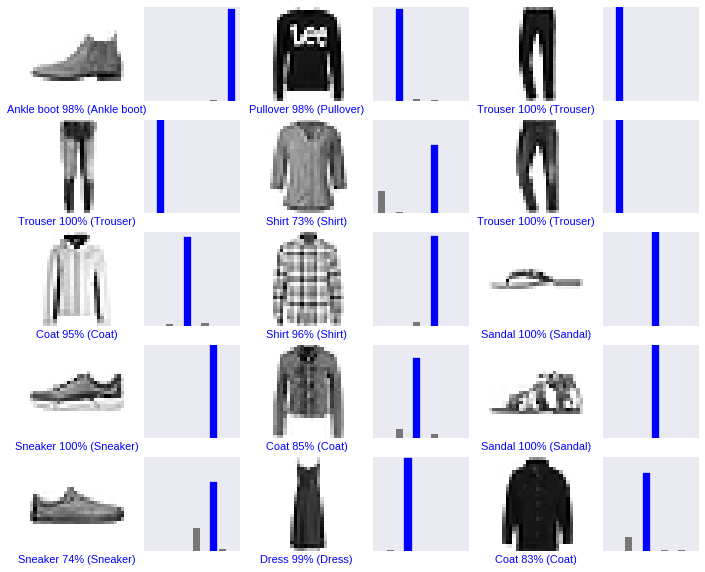

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.7742972e-07 3.1954028e-07 8.1018703e-07 1.7677168e-08 4.2705582e-07
  2.9443074e-03 5.6277156e-07 1.2206430e-02 6.1677142e-06 9.8484033e-01]]


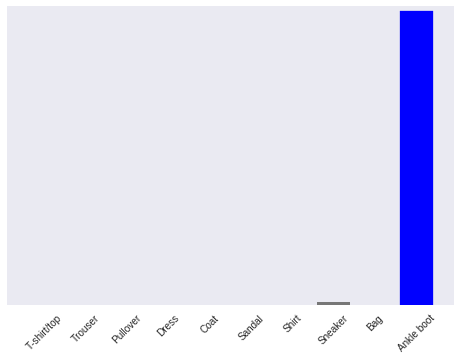

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)